In [3]:
import numpy as np
import pandas as pd

In [4]:
import glob

In [5]:
df = pd.read_csv("data/predictions.csv").iloc[:,2:]

In [6]:
# parsing filename to obtain data name

filelist = glob.glob("data/dataset/*")
scene_ids = pd.Series(filelist)[:-1].str.split("\\").str[1].str.split("_").str[0]
nums = pd.Series(filelist)[:-1].str.split("\\").str[1].str.split("_").str[1]
id_map = {}
for scene_id, num in zip(scene_ids, nums):
    id_map[scene_id] = num

In [27]:
object_list = [
    "002_master_chef_can",
    "003_cracker_box",
    "004_sugar_box",
    "005_tomato_soup_can",
    "006_mustard_bottle",
    "008_pudding_box",
    "010_potted_meat_can",
    "021_bleach_cleanser",
    "022_windex_bottle",
    "025_mug"
]
object_number_list = [2, 3, 4, 5, 6, 8, 10, 21, 22, 25]
object_map = {i:name for i, name in zip(object_number_list, object_list)}

In [7]:
df["object"] = df["scene_id"].apply(lambda x: id_map[x])
df["object"] = df["object"].astype(int)

In [8]:
orn_true = df.loc[:,['ornx', 'orny', 'ornz', 'ornw']] 
orn_pred = df.loc[:,['pred-ornx', 'pred-orny', 'pred-ornz', 'pred-ornw']]
zeros = np.zeros((len(df), 1))
ones = np.ones((len(df), 1))
orn_upright = np.block([zeros, np.sqrt(2)/2*ones, zeros, -np.sqrt(2)/2*ones])

# calculate init_rot_angle
init_rot_angle = []
for i in range(len(orn_true)):
    dot = orn_true.iloc[i,:].to_numpy() @ orn_upright[i,:]
    init_rot_angle.append(np.arccos(2*dot**2 -1))
df["init_rot_angle"] = init_rot_angle

In [9]:
df[df.loss < 0.4].groupby(by="object")["loss"].mean().sort_values()

object
10    0.125459
22    0.125812
5     0.131542
4     0.134457
3     0.135936
21    0.143620
25    0.147305
6     0.161007
2     0.171376
8     0.193265
Name: loss, dtype: float64

<AxesSubplot:xlabel='init_rot_angle', ylabel='loss'>

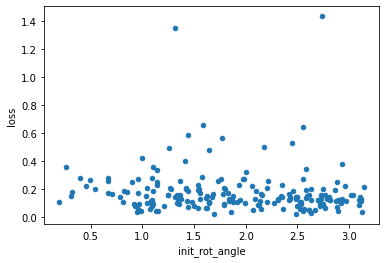

In [10]:
df.plot.scatter(x="init_rot_angle", y="loss")

<AxesSubplot:xlabel='init_rot_angle', ylabel='loss'>

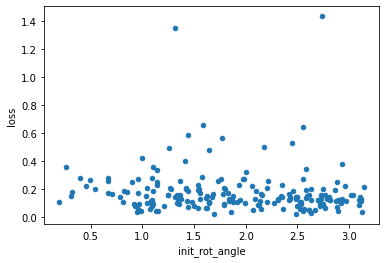

In [11]:
df.plot.scatter(x="init_rot_angle", y="loss")

<AxesSubplot:xlabel='object', ylabel='loss'>

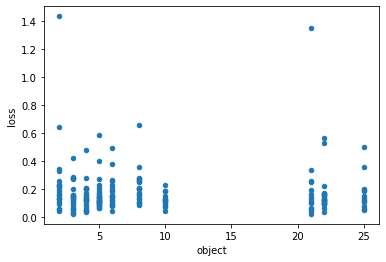

In [12]:
df.plot.scatter(x="object", y="loss")

In [13]:
df.sort_values(by="loss", ascending=False).loc[0].scene_id

'3e5a640372ca474aae778416bfc422df'

array([[<AxesSubplot:xlabel='loss', ylabel='loss'>,
        <AxesSubplot:xlabel='object', ylabel='loss'>,
        <AxesSubplot:xlabel='init_rot_angle', ylabel='loss'>],
       [<AxesSubplot:xlabel='loss', ylabel='object'>,
        <AxesSubplot:xlabel='object', ylabel='object'>,
        <AxesSubplot:xlabel='init_rot_angle', ylabel='object'>],
       [<AxesSubplot:xlabel='loss', ylabel='init_rot_angle'>,
        <AxesSubplot:xlabel='object', ylabel='init_rot_angle'>,
        <AxesSubplot:xlabel='init_rot_angle', ylabel='init_rot_angle'>]],
      dtype=object)

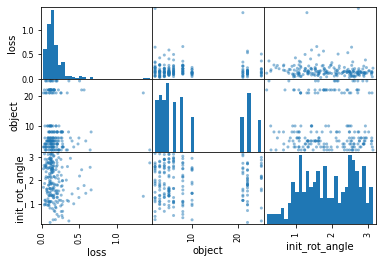

In [14]:
pd.plotting.scatter_matrix(df.loc[:,["loss", "object", "init_rot_angle"]], hist_kwds={'bins':30})

In [15]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

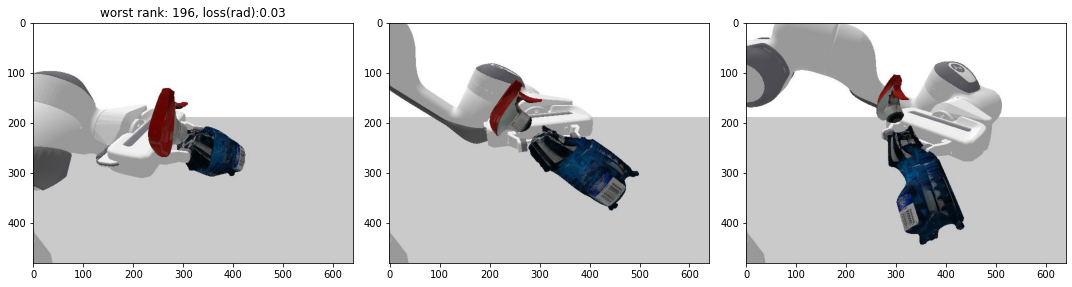

In [46]:
worst_rank = 196
info = df.sort_values(by="loss", ascending=False).iloc[worst_rank]
scene_id = info.scene_id
mask1 = pd.Series(filelist).str.contains(scene_id)
mask2 = pd.Series(filelist).str.contains("seg")
jpglist = pd.Series(filelist)[mask1 & ~mask2]
# plot
fig, axarr = plt.subplots(1, 3, figsize=[15, 7])
axarr[0].set_title(f"worst rank: {worst_rank}, loss(rad):{info.loss:.2f}")
for i, file in enumerate(jpglist):
    img = mpimg.imread(file)
    axarr[i].imshow(img)
plt.tight_layout()

In [47]:
print("label")
qtn = info[["ornx", "orny", "ornz", "ornw"]].to_numpy()
qtn_string = "["
for q in qtn:
    qtn_string += str(q)
    qtn_string += ","
qtn_string += "]"
print(object_map[info.object])
print(qtn_string)

label
022_windex_bottle
[0.2695448845950335,-0.7654487669388779,0.3121612640731989,0.4939525134996522,]


In [48]:
print("pred")
qtn = info[["pred-ornx", "pred-orny", "pred-ornz", "pred-ornw"]].to_numpy()
qtn_string = "["
for q in qtn:
    qtn_string += str(q)
    qtn_string += ","
qtn_string += "]"
print(object_map[info.object])
print(qtn_string)

pred
022_windex_bottle
[0.2654561400413513,-0.7763929963111877,0.3035919666290283,0.4843333661556244,]


In [250]:
df.sort_values(by="loss", ascending=False)

,scene_id,posx,posy,posz,ornx,orny,ornz,ornw,r11,r21,...,r13,r23,r33,pred-ornx,pred-orny,pred-ornz,pred-ornw,loss,object,init_rot_angle
131,b71d87c9653d493eb1ef5bd8c3254ba0,-0.005980,0.064904,-0.029827,-0.811652,0.221992,0.189759,0.505896,0.829422,-0.168365,...,-0.083426,0.905474,-0.416121,-0.430980,0.695166,0.484191,0.310739,1.435739,2,2.737345
123,dc8c1fa51aeb447b9bcd94964f04fff1,-0.029276,0.077499,0.079293,-0.307657,-0.244173,-0.280248,0.875893,0.723682,-0.340691,...,-0.255298,0.675807,0.691454,0.718242,0.329685,0.465636,-0.398271,1.349675,21,1.313418
7,99fdd20a5b794f96a78bb46119316dc7,0.000409,-0.006042,-0.002261,-0.530041,-0.210212,-0.250614,0.782343,0.786007,-0.169290,...,-0.063244,0.934711,0.349735,-0.686066,-0.038611,-0.027951,0.725976,0.655762,8,1.585632
156,63f72936bd29405f9ca8ff88d354f136,0.040498,0.020702,-0.051394,0.354336,0.003839,-0.837195,0.416576,-0.401821,-0.694789,...,-0.590098,-0.301644,0.748862,-0.313870,-0.067131,0.939127,-0.122557,0.643016,2,2.549275
175,86eb11a704bb4fc1a2e4a698e3fc375c,-0.006951,0.001155,0.015160,-0.122120,-0.177961,0.413072,0.884753,0.595403,0.774398,...,-0.415792,0.069070,0.906833,0.141076,-0.199238,0.517643,0.820029,0.584658,5,1.441071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,a16383540a314dfd8b9cbf67fab3713f,0.010745,-0.009611,-0.001079,0.634316,-0.245637,-0.685947,-0.258424,-0.061721,0.042907,...,-0.743256,0.664833,0.074612,-0.631662,0.231106,0.689624,0.268350,0.036344,3,3.123509
59,ec3bae549d634fceb82424b4a2d749de,0.034840,0.044101,0.018794,0.269545,-0.765449,0.312161,0.493953,-0.366713,-0.104260,...,-0.587908,-0.744172,-0.317133,0.265456,-0.776393,0.303592,0.484333,0.034781,22,0.944570
153,0e6a29c50f73483b9ba9973bfd531ebf,0.029598,-0.009180,-0.003293,-0.665258,-0.067764,0.684184,0.291087,0.054599,0.488475,...,-0.949768,0.294571,0.105680,-0.669286,-0.071120,0.685868,0.276737,0.030737,3,2.628491
109,3b9ef45d27554e70bb3d1087ab54b40e,-0.051926,0.012540,-0.014699,-0.721554,0.334689,0.594324,-0.118838,0.069525,-0.624249,...,-0.937221,0.226331,-0.265313,-0.729035,0.332637,0.586271,-0.118938,0.022364,21,2.488673
